# Flower Classification using Decision Tree

In this notebook I will build a model to classify the classic Iris dataset. This dataset shows a set of measurements of the petals and sepals of three flower species: setosa, versicolor and virginica.

### Step 01: Importing Libs

I will use pandas and numpy libraries for data structures, and sklearn for everything that involves learning

In [13]:
import pandas as pd
import numpy as np

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

### Step 02: Loading Iris Dataset

The iris dataset is available on sklearn. It comes in a numpy object, which we will use in the learning process, but I will also transform it into a pandas dataframe to create visualizations more easily

In [14]:
iris = datasets.load_iris()

In [15]:
df_iris = pd.DataFrame(np.c_[iris['data'], iris['target']],
                      columns=np.append(iris['feature_names'], 'target'))

### Step 03: Exploring Iris Dataset

In this chart, each iris species is represented by a color. It's possible to analyze the relationship between attributes, as well as the distribution of each attribute individually.

It is noticeable that there is a species that easily differentiates itself from the others.

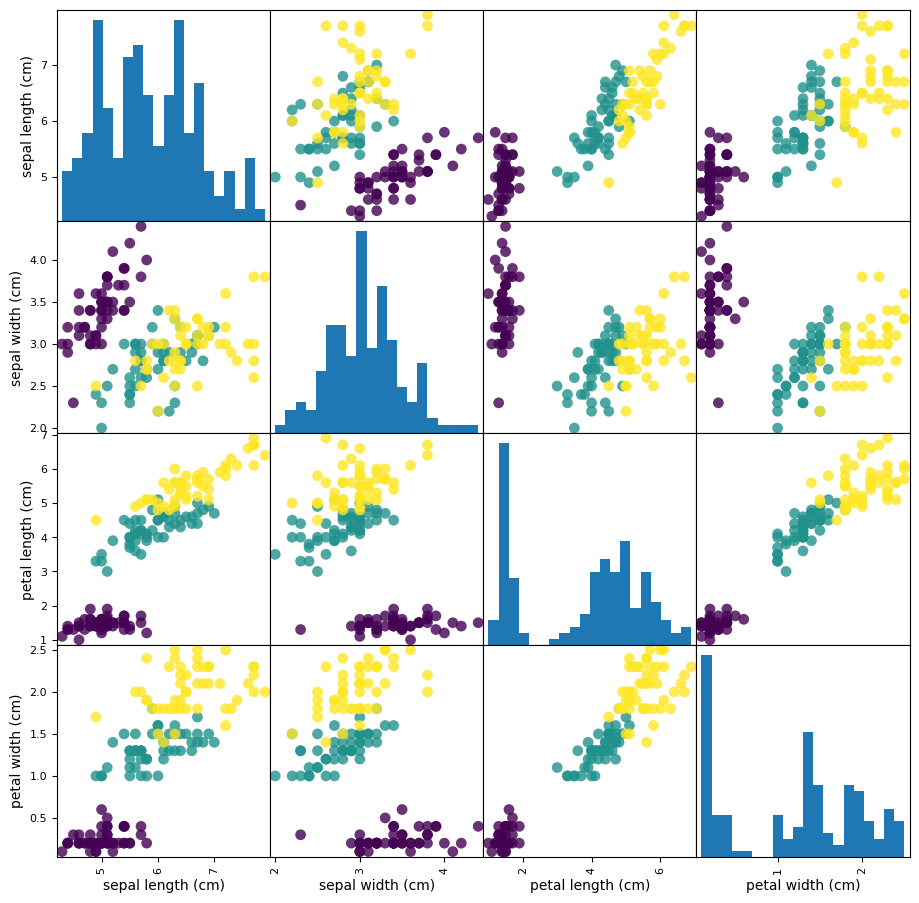

In [16]:
viz1 = pd.plotting.scatter_matrix(df_iris.iloc[:,:4], figsize=(11, 11), 
                                  c=iris.target, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In this graph it is possible to visualize the values of all attributes for all species, and it is even clearer that only the petal length is enough to classify one of the species

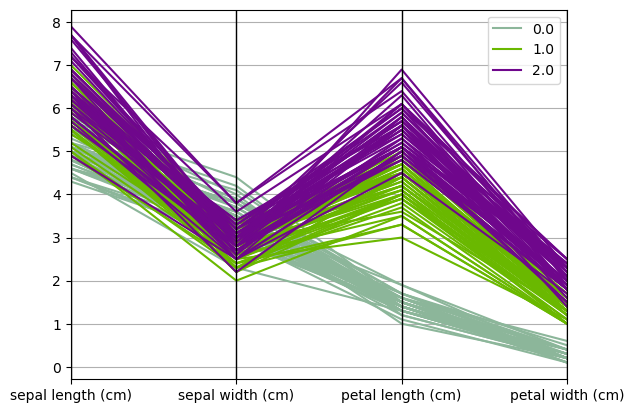

In [17]:
viz2 = pd.plotting.parallel_coordinates(df_iris, 'target')

### Step 04: Separating Training and Testing Base

First the division is made, where X corresponds to the values and y corresponds to the class. To partition the training and testing base, we will use the train_test_split method provided by sklearn. By default, this division is 75% of the data for the training base and 25% of the data for the test base. As we have little data, we will use 85% for the training base and 15% for the testing base.

In [18]:
X, y = iris.data, iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

### Step 05: Creating the Model and Training 

The first line creates a decision tree model.

**_random_state=0_** defines a fixed initial state for the random number generator. This ensures that the model results are reproducible. Whenever you run the code with the same random_state, you will get the same model.

**_criterion='entropy'_** specifies the criterion used to measure the quality of splits. 'entropy' refers to information entropy, a measure of the impurity of a node. Alternatively, one can use 'gini' for the Gini index.

**_class_weight={0:1, 1:1}_** defines the weight associated with each class in the classification problem. In this case, both class 0 and class 1 have a weight of 1. This means that the model will treat both classes with the same importance, without adjusting weights based on class imbalance.

In the second line, the model is trained using the provided training data.

In [19]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0:1, 1:1})
tree_iris = tree_iris.fit(X_train, y_train)

### Step 06: Accuracy

These three lines of code do the following:
- Use the trained model to predict class labels for the test data (X_test).
- Calculate the accuracy of the predictions by comparing them with the actual labels (y_test).
- Generate a detailed classification report to evaluate the model's performance for each class, allowing you to identify which classes are being correctly classified and which may need improvement.

This provides a quantitative measure of how well the model is performing in terms of getting classifications correct on the test data.

In [20]:
y_pred = tree_iris.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [21]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



### Step 07: Confusion Matrix

Displays a confusion matrix to evaluate the performance of the classification model. The confusion matrix is a table that allows you to visualize the performance of the classification algorithm, showing the count of true positives, false positives, true negatives and false negatives for each class

In [22]:
c_matrix = confusion_matrix(y_test, y_pred)
c_table = pd.DataFrame(data=c_matrix, index=iris.target_names, columns=[x + " (prev)" for x in iris.target_names])
print(c_table)

            setosa (prev)  versicolor (prev)  virginica (prev)
setosa                  7                  0                 0
versicolor              0                 11                 0
virginica               0                  0                 5


## Considerations
It is a very simple dataset, which is why the results were so excellent, the model correctly classified all species